In [56]:
from db_conn import query_from_db as sql_query
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
ai_comp = sql_query("""

SELECT c.CompanyName, c.YearFounded
FROM Company c
WHERE c.YearFounded BETWEEN 2017 AND 2023
   AND (c.CompanyName LIKE '%.AI%' OR c.CompanyName LIKE 'AI %' OR c.CompanyName LIKE '% AI %' )
""")
ai_comp

Connected to pitchbook_db database


Query Progress: 0 row [00:00, ? row/s]/Users/student/Documents/UNI/2023 Fall/Consultancy Project/EXAM 60%/PyNotebooks/db_conn.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chunk = pd.read_sql_query(chunk_query, connection)
Query Progress: 942 row [00:03, 283.48 row/s]

Query took 3.33 seconds
Connection closed


,CompanyName,YearFounded
0,Socrates.Ai,2017.0
1,Artivatic.ai,2017.0
2,Integrate.ai,2017.0
3,Percept.AI,2017.0
4,INDUS.AI,2017.0
...,...,...
937,IVP.ai,2022.0
938,AI Like Me,2023.0
939,4-Eyes.ai,2023.0
940,ComeHome.ai,2023.0


In [58]:
ai_comp_new = sql_query("""

SELECT c.CompanyName, c.YearFounded
FROM Company c
WHERE c.YearFounded BETWEEN 2010 AND 2016
   AND (c.CompanyName LIKE '%.AI%' OR c.CompanyName LIKE 'AI %' OR c.CompanyName LIKE '% AI %' )
""")
ai_comp_new

Connected to pitchbook_db database


Query Progress: 0 row [00:00, ? row/s]/Users/student/Documents/UNI/2023 Fall/Consultancy Project/EXAM 60%/PyNotebooks/db_conn.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chunk = pd.read_sql_query(chunk_query, connection)
Query Progress: 305 row [00:03, 78.15 row/s] 

Query took 3.91 seconds
Connection closed


,CompanyName,YearFounded
0,Composure.ai,2013.0
1,Loop AI Labs,2012.0
2,inflo.Ai,2013.0
3,Yellow.ai,2015.0
4,REACH.ai,2011.0
...,...,...
300,Compliance.ai,2014.0
301,HEAVY.AI,2013.0
302,Archie.AI,2014.0
303,Captain.ai,2014.0


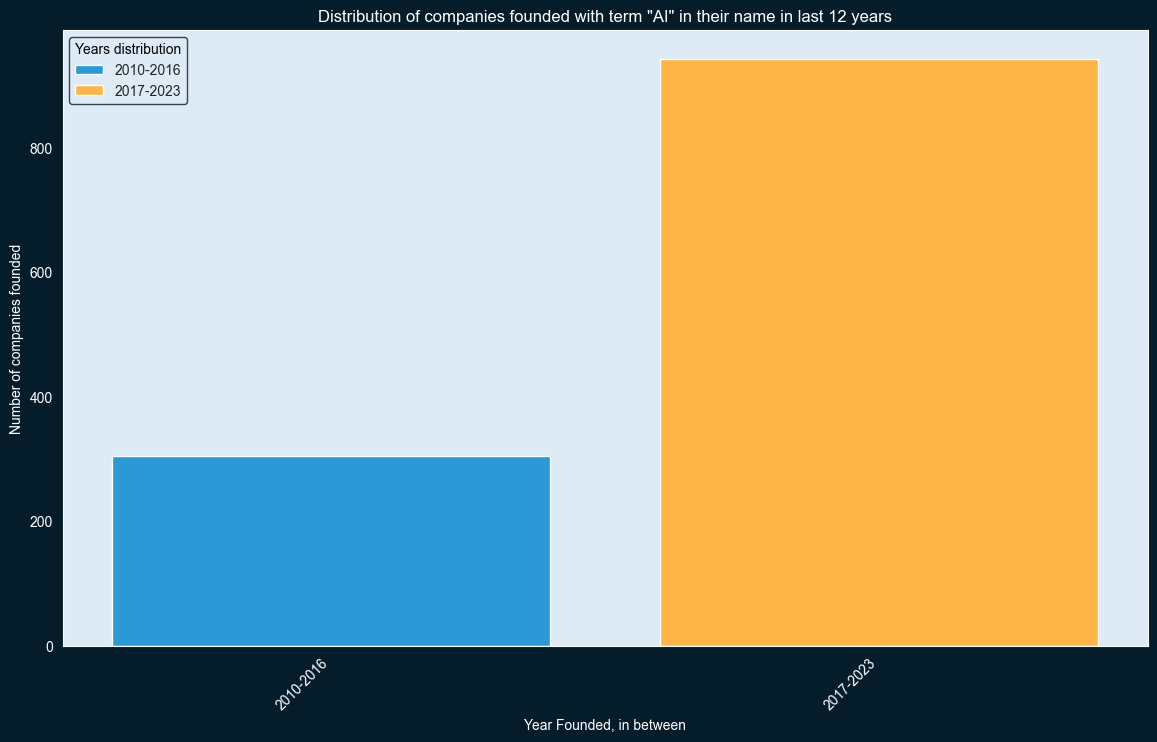

In [59]:
companies_2017_2023 = ai_comp.shape[0]

companies_2010_2016 = ai_comp_new.shape[0]
years_range = [ '2010-2016', '2017-2023',]
num_companies = [companies_2010_2016, companies_2017_2023]

fig, ax = plt.subplots(figsize=(14, 8))

# Set colors for text, outer background, inner background, and axis
text_color = '#FFFFFF'
outer_background_color = '#051C2A'
inner_background_color = '#DEEBF7'
axis_color = '#FFFFFF'

fig.patch.set_facecolor(outer_background_color)
ax.set_facecolor(inner_background_color)
ax.tick_params(axis='both', colors=axis_color)
ax.spines['bottom'].set_color(axis_color)
ax.spines['top'].set_color(axis_color)
ax.spines['right'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)


ax.bar(years_range, num_companies, color=['#2A99D5', '#FFB546'] , label=years_range, alpha=1)

ax.set_xlabel('Year Founded, in between', color=text_color)
ax.set_ylabel('Number of companies founded', color=text_color)
ax.set_title('Distribution of companies founded with term "AI" in their name in last 12 years', color=text_color)
ax.grid(False)
legend = ax.legend(title='Years distribution', facecolor=inner_background_color, edgecolor=outer_background_color)
legend.get_title().set_color('black')

plt.xticks(rotation=45, ha='right', color=text_color)
plt.savefig('AI_as_trend_in_company_names.svg', format='svg')
plt.show()